In [1]:
# importing the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# importing the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# loading train and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

In [4]:
# finding the number of classes
classes = np.unique(y_train)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


Therefore, there are 10 classes.

In [5]:
# finding the dimensions of each image
x_train.shape

(60000, 28, 28)

Therefore, the image dimensions are 28 x 28.

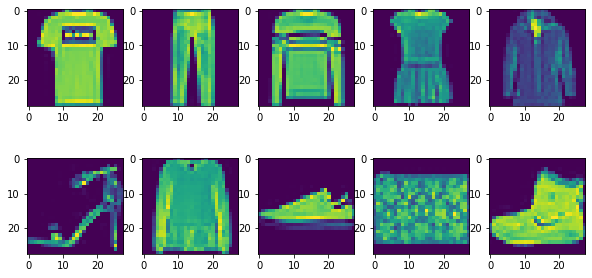

In [6]:
# displaying an image of each class

fig, axes = plt.subplots(2, 5, figsize=(10, 5))     # subplots (grid with 2 rows, 5 columns)
for i in classes:
  idx = y_train.tolist().index(i)                   # first occurrence of each class
  ax = axes[i//5, i%5]
  ax.imshow(x_train[idx])

In [7]:
# normalizing the data
x_train = x_train/255.
x_test = x_test/255.

In [8]:
# building a model with 2 hidden layers
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'))
model1.add(tf.keras.layers.Dense(300, activation='relu', name="hiddenLayer1"))
model1.add(tf.keras.layers.Dense(100, activation='relu', name="hiddenLayer2"))
model1.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# training the 2 layer model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 15

history1 = model1.fit(x_train, y_train, batch_size, epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 10s 5ms/step - loss: 0.4842 - accuracy: 0.8258 - val_loss: 0.4306 - val_accuracy: 0.8342
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3660 - accuracy: 0.8648 - val_loss: 0.3516 - val_accuracy: 0.8722
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3310 - accuracy: 0.8768 - val_loss: 0.3618 - val_accuracy: 0.8668
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3064 - accuracy: 0.8854 - val_loss: 0.3414 - val_accuracy: 0.8780
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2851 - accuracy: 0.8934 - val_loss: 0.3497 - val_accuracy: 0.8740
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.8978 - val_loss: 0.3162 - val_accuracy: 0.8867
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2586 - accuracy: 0.9019 - val_loss: 0.3243 - val_accuracy

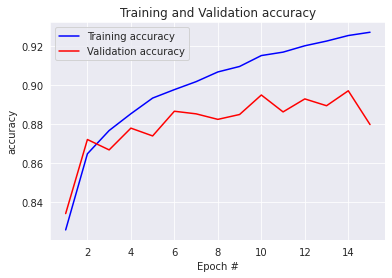

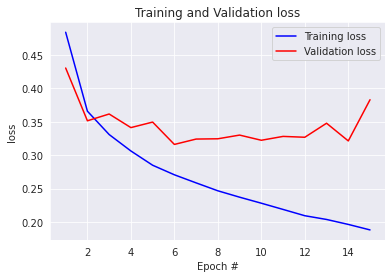

In [22]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()


In [11]:
# plotting the confusion matrix
y_pred = np.argmax(model1.predict(x_test, len(y_test)//batch_size), axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[827   0  10  51   2   2  98   0  10   0]
 [  4 963   0  22   3   0   5   1   2   0]
 [ 26   1 792  17  55   1 107   0   1   0]
 [ 14   2   7 939  13   0  21   0   4   0]
 [  2   0  76  57 676   0 185   0   4   0]
 [  0   0   0   0   0 966   0  22   1  11]
 [116   0  56  48  24   0 743   0  13   0]
 [  0   0   0   0   0  10   0 977   0  13]
 [  5   0   3   5   2   4   3   7 971   0]
 [  0   0   0   0   0   9   1  56   0 934]]


In [12]:
# testing the 2 layer model
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4079 - accuracy: 0.8788


[0.4078587293624878, 0.8787999749183655]

In [13]:
# building a model with 5 hidden layers
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'))
model2.add(tf.keras.layers.Dense(300, activation='relu', name="hiddenLayer1"))
model2.add(tf.keras.layers.Dense(180, activation='relu', name="hiddenLayer2"))
model2.add(tf.keras.layers.Dense(90, activation='relu', name="hiddenLayer3"))
model2.add(tf.keras.layers.Dense(45, activation='relu', name="hiddenLayer4"))
model2.add(tf.keras.layers.Dense(22, activation='relu', name="hiddenLayer5"))
model2.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 180)               54180     
                                                                 
 hiddenLayer3 (Dense)        (None, 90)                16290     
                                                                 
 hiddenLayer4 (Dense)        (None, 45)                4095      
                                                                 
 hiddenLayer5 (Dense)        (None, 22)                1012      
                                                                 
 outputLayer (Dense)         (None, 10)               

In [18]:
# training the 5 layer model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 15

history2 = model2.fit(x_train, y_train, batch_size, epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1534 - accuracy: 0.9434 - val_loss: 0.3950 - val_accuracy: 0.8947
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1516 - accuracy: 0.9433 - val_loss: 0.3854 - val_accuracy: 0.8970
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1446 - accuracy: 0.9436 - val_loss: 0.4252 - val_accuracy: 0.8947
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9461 - val_loss: 0.4181 - val_accuracy: 0.8950
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1447 - accuracy: 0.9448 - val_loss: 0.4461 - val_accuracy: 0.8890
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9484 - val_loss: 0.4084 - val_accuracy: 0.8975
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1341 - accuracy: 0.9494 - val_loss: 0.4472 - val_accuracy:

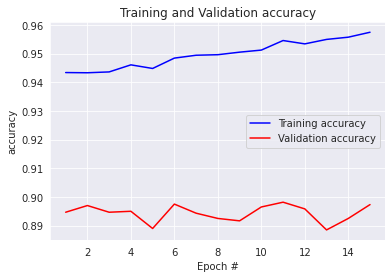

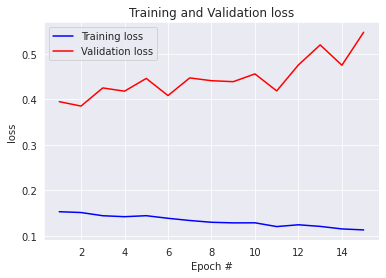

In [23]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()


In [20]:
# plotting the confusion matrix
y_pred = np.argmax(model2.predict(x_test, len(y_test)//batch_size), axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[853   3   7  29   3   2  98   0   5   0]
 [  1 979   1  12   3   0   2   1   1   0]
 [ 20   0 812   8  92   0  67   0   1   0]
 [ 16  12   7 893  47   0  22   0   3   0]
 [  1   1  80  19 833   0  63   0   3   0]
 [  0   0   0   0   0 971   0  18   1  10]
 [131   1  62  28  66   0 703   0   9   0]
 [  0   0   0   0   0   4   0 977   0  19]
 [  4   0   1   2   4   2   7   5 975   0]
 [  0   0   0   1   0   8   1  43   0 947]]


In [21]:
# testing the 5 layer model
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.8943


[0.5395880937576294, 0.8942999839782715]

The accuracy remains majorly unaffected (only a minimal change). Adding hidden layers does not necessarily increase accuracy, but may improve performance (training loss is lower)